In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target = []
images = []
flat_data = []

In [ ]:
!unzip /content/drive/MyDrive/mri-image/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/m

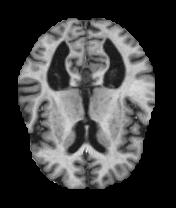

In [ ]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('Alzheimer_s Dataset/train/VeryMildDemented/verymildDem475.jpg')
img

In [ ]:
!unzip -uq "/content/drive/MyDrive/mri-image/train.zip" -d "/content/drive/My Drive/mri-image-unzipdata"



In [5]:
CATEGORIES = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
DATADIR ="/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train"

In [6]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category) # Label Encoding the values
  path = os.path.join(DATADIR,category) # Create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # print(img_array.shape)
    # plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) # Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid = [
  {'C': [0.1,1,10,100], 'kernel': ['linear']},
 ]
svc = svm.SVC(probability=True)
classifier = GridSearchCV(svc, param_grid, verbose = 3)
classifier.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.950 total time= 5.7min
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.955 total time= 5.4min
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.979 total time= 5.3min
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.965 total time= 5.3min
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.969 total time= 5.4min


GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [0.1], 'kernel': ['linear']}], verbose=3)

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred, target_names=CATEGORIES))

                  precision    recall  f1-score   support

    MildDemented       0.99      0.99      0.99       216
ModerateDemented       1.00      0.95      0.98        22
     NonDemented       0.99      0.98      0.99       768
VeryMildDemented       0.97      0.99      0.98       531

        accuracy                           0.98      1537
       macro avg       0.99      0.98      0.98      1537
    weighted avg       0.98      0.98      0.98      1537



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

rf_100 = RandomForestClassifier(max_features=5, n_estimators=100)
rf_100.fit(x_train, y_train)

RandomForestClassifier(max_features=5)

In [ ]:
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import roc_curve
r_probs = [0 for _ in range(len(y_test))]
probs_svm =classifier.predict_proba(x_test)
rf_probs = rf_100.predict_proba(x_test)
nb_probs = nb.predict_proba(x_test)
knn_probs = knn.predict_proba(x_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
#r_auc = roc_auc_score(y_test, r_probs, multi_class="ovo")
rf_auc = roc_auc_score(y_test, rf_probs, multi_class="ovo")
nb_auc = roc_auc_score(y_test, nb_probs, multi_class="ovo")
svm_auc = roc_auc_score(y_test, probs_svm, multi_class="ovo")
knn_auc = roc_auc_score(y_test, knn_probs, multi_class="ovo")

In [ ]:
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))
print('SVM: AUROC = %.3f' % (svm_auc))
print('KNN: AUROC = %.3f' % (knn_auc))

Random Forest: AUROC = 0.949
Naive Bayes: AUROC = 0.733
SVM: AUROC = 0.999
KNN: AUROC = 0.998


In [ ]:
import pandas as pd
cm = confusion_matrix(y_pred,y_test)
print(cm)
cm_df = pd.DataFrame(cm,
                     index = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'], 
                     columns = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'])

[[146   0   2   0]
 [  0  12   0   0]
 [  2   0 505   3]
 [  0   1   9 345]]


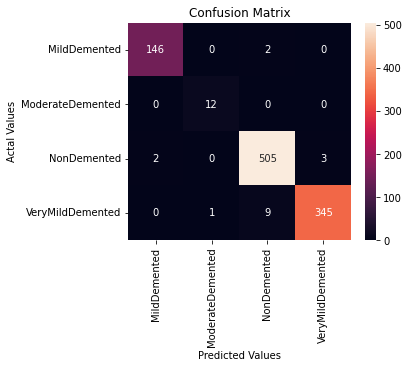

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [8]:
from keras.models import Sequential

In [10]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()

In [9]:
import tensorflow as tf

import tensorflow_datasets as tfds
import sklearn


In [11]:
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD, RMSprop, adam
from keras.utils import np_utils
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
#from sklearn import metricsfrom sklearn.utils import shuffle
#from sklearn.model_selection import train_test_splitimport matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
#import randomfrom numpy import *
from PIL import Image
#import theano

In [12]:
path_test = "/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train"

In [13]:
CATEGORIES = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
DATADIR ="/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train"

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, LeakyReLU
from tensorflow.keras.callbacks import TensorBoard
import pickle
from PIL import Image
import time
import os
from PIL import Image
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [14]:
IMAGE_SIZE = [176,208]               # input image dimensions                                              (176,208)
BATCH_SIZE = 5000
test_split_percent = .1       # % of total data for testing                                         .1
validation_split_percent = .2 # % of total data for validation                                      .2
zoom = [.99,1.01]             # zoom range (for a fixed zoom put the same value in both parameters)[.99,1.01]
bright_range = [.8,1.2]       # brightness range                                                    [.8,1.2] 
layers_unlocked = True        # unlock the imported pre-training layers?                            False  
lr = 0.01                   # learning rate for optimizer                                         0.0001
batch = 20                    # batch size for model fitting                                        20
EPOCHS = 50                     # number of epochs to run                                             50  

In [15]:
train_dr = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,fill_mode='constant',cval=0,
                                                           brightness_range=bright_range,zoom_range=zoom,
                                                           data_format='channels_last',zca_whitening=False)

train_data_gen = train_dr.flow_from_directory(directory="/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/train",target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE)

# Change to zoom = [1,1] to use normal test data
test_dr = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,fill_mode='constant',cval=0,zoom_range=[1,1],
                                                          data_format='channels_last') 
test_data_gen = test_dr.flow_from_directory(directory="/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset/test",target_size=IMAGE_SIZE,batch_size=BATCH_SIZE,
                                           shuffle = False) # test data should not be shuffle

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
train_data,train_labels =  train_data_gen.next()
test_data,test_labels = test_data_gen.next()

In [ ]:
total_data = np.concatenate((train_data,test_data))
total_labels = np.concatenate((train_labels,test_labels))
print(total_data.shape)
print(total_labels.shape)

In [ ]:
initial_split = test_split_percent+validation_split_percent
test_val_split = test_split_percent/initial_split

# split into training and (test + validation)
train_data, test_val_data, train_labels, test_val_labels = train_test_split(total_data,total_labels,
                                                                            test_size=initial_split)

# split (test + validation) into test and validation sets
test_data, val_data, test_labels, val_labels = train_test_split(test_val_data,test_val_labels,
                                                                test_size=test_val_split)

print('train: ',train_data.shape)
print('validation',val_data.shape)
print('test',test_data.shape)

In [17]:
print(train_data.shape)
print(train_labels.shape)
print(val_data.shape)
print(val_labels.shape)
print(test_data.shape)

(4395, 176, 208, 3)
(4395, 4)
(628, 176, 208, 3)
(628, 4)
(1256, 176, 208, 3)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,
                                  test_size=0.3,random_state=109)

In [18]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        #tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', strides=2, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

In [19]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [20]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE, 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        #tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(4, activation='softmax')
    ])
    
    return model

In [21]:
with strategy.scope():
    model = build_model()

    METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall'),tf.keras.metrics.AUC(name='auc')]

    
    model.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=METRICS
    )

In [22]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

#checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model.h5", save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [23]:
model_history = model.fit(train_data,train_labels,validation_data=(val_data,val_labels),
                             epochs=EPOCHS,batch_size=batch, shuffle=True) 

Epoch 1/50
220/220 [==============================] - 33s 95ms/step - loss: 1.5691 - accuracy: 0.7226 - precision: 0.4103 - recall: 0.2510 - auc: 0.6270 - val_loss: 1.1279 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7760
Epoch 2/50
220/220 [==============================] - 18s 80ms/step - loss: 1.1373 - accuracy: 0.7660 - precision: 0.5511 - recall: 0.3445 - auc: 0.7693 - val_loss: 1.0912 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7582
Epoch 3/50
220/220 [==============================] - 18s 80ms/step - loss: 1.0270 - accuracy: 0.7747 - precision: 0.5795 - recall: 0.3597 - auc: 0.8034 - val_loss: 0.9788 - val_accuracy: 0.7846 - val_precision: 0.6009 - val_recall: 0.4124 - val_auc: 0.8230
Epoch 4/50
220/220 [==============================] - 18s 80ms/step - loss: 0.9652 - accuracy: 0.7875 - precision: 0.6314 - recall: 0.3609 - auc: 0.8192 - val_loss: 1.1439 - val_accuracy: 0.7576 - val_precision

In [24]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 208, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 104, 16)      0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 44, 52, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 22, 26, 64)        7392      
                                                                 
 sequential_2 (Sequential)   (None, 11, 13, 128)       27072     
                                                      

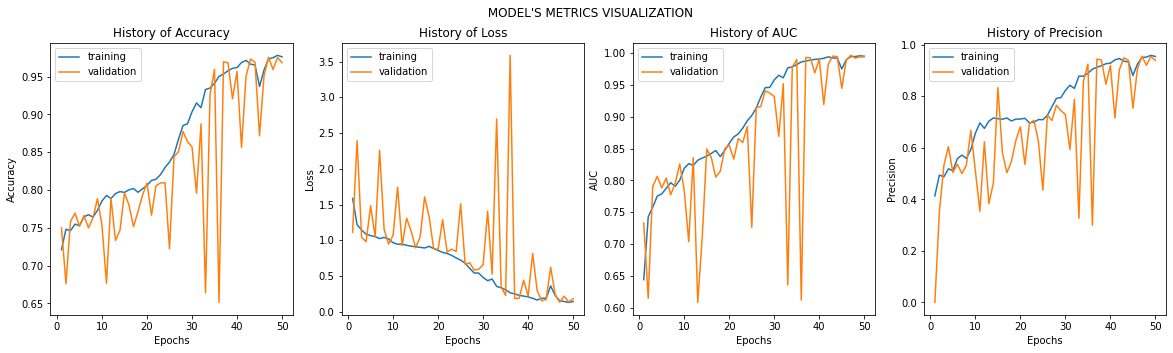

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision):
    
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    

    plt.show()
    

Train_Val_Plot(model_history.history['accuracy'],model_history.history['val_accuracy'],
               model_history.history['loss'],model_history.history['val_loss'],
               model_history.history['auc'],model_history.history['val_auc'],
              model_history.history['precision'],model_history.history['val_precision']  ) 

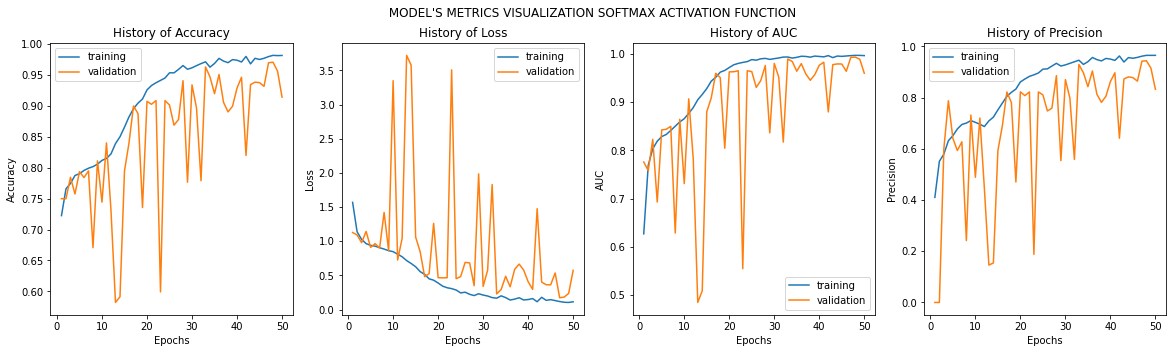

In [25]:
def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision):
    
    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION SOFTMAX ACTIVATION FUNCTION")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    
    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])
    
    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    

    plt.show()
    

Train_Val_Plot(model_history.history['accuracy'],model_history.history['val_accuracy'],
               model_history.history['loss'],model_history.history['val_loss'],
               model_history.history['auc'],model_history.history['val_auc'],
              model_history.history['precision'],model_history.history['val_precision']  ) 

In [ ]:
work_dir = '/content/drive/MyDrive/mri-image-unzipdata/Alzheimer_s Dataset'
model_dir = work_dir + "scratch_alzheimer_pre_process"
model.save(model_dir, save_format='h5')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 208, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 88, 104, 16)      0         
 )                                                               
                                                                 
 sequential (Sequential)     (None, 44, 52, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 22, 26, 64)        7392      
                                                                 
 sequential_2 (Sequential)   (None, 11, 13, 128)       27072     
                                                      

In [27]:
pred_labels = model.predict(test_data)

40/40 [==============================] - 1s 16ms/step


In [ ]:
_ = model.evaluate(test_data, test_labels)

40/40 [==============================] - 0s 10ms/step - loss: 0.1670 - accuracy: 0.9691 - precision: 0.9386 - recall: 0.9379 - auc: 0.9944


softmax activation

In [1]:
_ = model.evaluate(test_data, test_labels)

NameError: ignored

In [ ]:
CLASSES = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

                  precision    recall  f1-score   support

    MildDemented       0.95      0.96      0.95       186
ModerateDemented       1.00      0.89      0.94         9
     NonDemented       0.98      0.91      0.95       648
VeryMildDemented       0.88      0.97      0.92       413

       micro avg       0.94      0.94      0.94      1256
       macro avg       0.95      0.93      0.94      1256
    weighted avg       0.94      0.94      0.94      1256
     samples avg       0.94      0.94      0.94      1256



activation fucntion softmax

In [26]:
CLASSES = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

NameError: ignored